In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [82.3 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 https://developer.download.nvi

In [3]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [4]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.l

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   497k      0  0:00:02  0:00:02 --:--:--  919k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [5]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [6]:
mecab = Mecab()
sentence = "안녕하세요 저는 천재입니다."
temp_X = mecab.morphs(sentence)
temp_X

['안녕', '하', '세요', '저', '는', '천재', '입니다', '.']

In [7]:
import pandas as pd
import re

In [8]:
!pip3 install torch
!pip3 install torchvision

In [9]:
import torch

In [12]:
df_raw = pd.read_csv('/content/drive/MyDrive/통계데이터 콘테스트/dataset/text_digit_1.csv')
df_raw.head()

,text_total,digit_1
0,카센터에서 자동차부분정비 타이어오일교환,S
1,상점내에서 일반인을 대상으로 채소.과일판매,G
2,절단하여사업체에도매 공업용고무를가지고 합성고무도매,G
3,영업점에서 일반소비자에게 열쇠잠금장치,G
4,어린이집 보호자의 위탁을 받아 취학전아동보육,Q


In [13]:
df_raw['digit_1'].unique()

array(['S', 'G', 'Q', 'C', 'I', 'O', 'F', 'P', 'H', 'N', 'R', 'M', 'J',
       'L', 'B', 'K', 'E', 'D', 'A'], dtype=object)

In [14]:
df_raw.nunique()

text_total    697079
digit_1           19
dtype: int64

In [16]:
df_raw_test = pd.read_csv('/content/drive/MyDrive/통계데이터 콘테스트/dataset/text_digit_1_test.csv')
df_raw_test.head()

,text_total,digit_1
0,치킨전문점에서 고객의주문에의해 치킨판매,NaN
1,산업공구 다른 소매업자에게 철물 수공구,NaN
2,절에서 신도을 대상으로 불교단체운영,NaN
3,영업장에서 고객요구로 자동차튜닝,NaN
4,"실내포장마차에서 접객시설을 갖추고 소주,맥주제공",NaN


In [17]:
from torchtext.legacy import data 

tokenizer = Mecab()

In [18]:
def get_length(title):
    return len(title)

df_raw['text_total_len'] = df_raw['text_total'].apply(get_length)

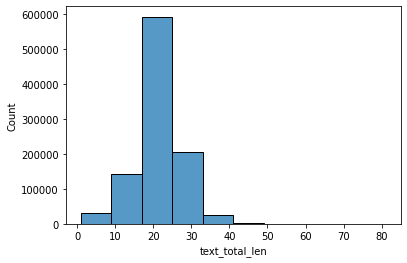

In [19]:
import seaborn as sns
import numpy as np 


np.median(df_raw['text_total_len'].to_list())
np.max(df_raw['text_total_len'].to_list())

sns.histplot(df_raw['text_total_len'],bins = 10)

In [20]:
# 필드 정의
from torchtext.legacy import data 

# 실제 사용은 하지 않을 예정
INDEX = data.Field(sequential = False,
                use_vocab = False)

TITLE = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs, # 토크나이저로는 Okt 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=44)

LABEL = data.Field(sequential=False,
                   use_vocab=True,
                   is_target=True)

In [21]:
from sklearn.model_selection import StratifiedKFold
from keras.utils import np_utils


skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

for i,(trn_idx,val_idx) in enumerate(skf.split(df_raw['text_total'],df_raw['digit_1'])):
    trn = df_raw.iloc[trn_idx]
    val = df_raw.iloc[val_idx]

In [22]:
trn.to_csv('/content/drive/MyDrive/통계데이터 콘테스트/dataset/trn.csv',index = False, encoding= 'utf-8-sig')
val.to_csv('/content/drive/MyDrive/통계데이터 콘테스트/dataset/val.csv',index = False, encoding= 'utf-8-sig')

In [23]:
#테스트 csv파일 초기화 및 저장
df_raw_test['digit_1'] = 0
df_raw_test.to_csv('/content/drive/MyDrive/통계데이터 콘테스트/dataset/test.csv',index = False)

In [24]:
from torchtext.legacy.data import TabularDataset

train_data, validation_data,test_data =TabularDataset.splits(
     path='/content/drive/MyDrive/통계데이터 콘테스트/dataset/', train='trn.csv',validation= 'val.csv', test='test.csv', format='csv',
        fields=[('text_total', TITLE), ('digit_1', LABEL)], skip_header=True)

In [25]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('검증 샘플의 개수 : {}'.format(len(validation_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 800000
검증 샘플의 개수 : 200000
테스트 샘플의 개수 : 100000


In [26]:
TITLE.build_vocab(train_data, min_freq = 2, max_size = 20000)

In [27]:
LABEL.build_vocab(train_data)

In [28]:
print('단어 집합의 크기 : {}'.format(len(TITLE.vocab)))

단어 집합의 크기 : 19861


데이터 로더 만들기

In [29]:
from torchtext.legacy.data import Iterator

In [30]:
# 하이퍼파라미터
batch_size = 128
lr = 0.001
EPOCHS = 20

In [31]:
train_loader = Iterator(dataset = train_data, batch_size = batch_size)
val_loader = Iterator(dataset = validation_data, batch_size = batch_size)
test_loader = Iterator(dataset = test_data, batch_size = batch_size,shuffle = False)

In [32]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('검증 데이터의 미니 배치 수 : {}'.format(len(val_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 6250
검증 데이터의 미니 배치 수 : 1563
테스트 데이터의 미니 배치 수 : 782


LSTM 모델 구현

In [58]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [59]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext import data, datasets
import random

In [60]:
class Net(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p=0.2):
        super(Net, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.embed = nn.Embedding(n_vocab, embed_dim)
        self.dropout = nn.Dropout(dropout_p)
        self.lstm = nn.LSTM(embed_dim, self.hidden_dim,
                          num_layers=self.n_layers,
                          batch_first=True)
        self.out = nn.Linear(self.hidden_dim, n_classes)

    def forward(self, x):
        x = self.embed(x)
        x, (ho,co) = self.lstm(x)
        h_t = x[:,-1,:] # 모든 문장을 거쳐서 나온 가장 마지막 단어의 출력 값
        self.dropout(h_t)
        logit = self.out(h_t)  # (배치 크기, 은닉 상태의 크기) -> (배치 크기, 출력층의 크기)
        return logit

    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

In [160]:
import numpy as np

def train(model, optimizer, train_iter):
    """모델 학습"""
    model.train()
    for i, batch in enumerate(train_iter):
        x, y = batch.text_total.to(DEVICE), batch.digit_1.to(DEVICE)

        optimizer.zero_grad()

        logit = model(x)
        y= torch.tensor(y,dtype = torch.long,device =DEVICE)

        loss = F.cross_entropy(logit,y)
        loss.backward()
        optimizer.step()

In [161]:
!pip3 install torchmetrics

In [172]:
from torchmetrics.functional import f1_score

def evaluate(model, val_iter):
    """검증 데이터셋 평가"""
    model.eval()
    batch_cor, total_loss = 0, 0

    avg_f1 = 0
    for batch in val_iter:
        x, y = batch.text_total.to(DEVICE), batch.digit_1.to(DEVICE)
        y = torch.tensor(y, dtype = torch.long, device=DEVICE)

        # prediction
        logit = model(x).to(DEVICE)

        # accuracy, loss
        loss = F.cross_entropy(logit, y)
        total_loss += loss.item()
        batch_cor += (logit.max(1)[1] == y.data).sum()

        # f1-score
        avg_f1 += f1_score(logit, y, num_classes=20)

    size = len(val_iter.dataset)

    avg_loss = total_loss / size 
    avg_accuracy = 100.0 * batch_cor / size

    return avg_loss, avg_accuracy, avg_f1

In [174]:
vocab_size = len(TITLE.vocab) 
n_classes = 20
print('단어 집합의 크기 : {}'.format(vocab_size))
print('클래스의 개수 : {}'.format(n_classes))

단어 집합의 크기 : 19861
클래스의 개수 : 20


In [175]:
# 모델 및 옵티마이저 설정
model = Net(1, 8, vocab_size , 128, n_classes, 0.2).to(DEVICE)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

In [176]:
import warnings
warnings.filterwarnings('ignore')

best_val_loss = None
best_model = []

for e in range(1, EPOCHS + 1 ):
    train(model, optimizer, train_loader)
    val_loss, val_accuracy, val_f1 = evaluate(model, val_loader)

    print("[Epoch: %d] val loss : %5.5f | val accuracy : %5.2f | val f1-score : %5.2f" % (e, val_loss, val_accuracy, val_f1))

    # 검증 오차가 가장 적은 최적의 모델을 저장
    if not best_val_loss or val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model

[Epoch: 1] val loss : 0.01210 | val accuracy : 42.91 | val f1-score : 670.63
[Epoch: 2] val loss : 0.00568 | val accuracy : 80.22 | val f1-score : 1253.94
[Epoch: 3] val loss : 0.00401 | val accuracy : 87.54 | val f1-score : 1368.31
[Epoch: 4] val loss : 0.00313 | val accuracy : 91.07 | val f1-score : 1423.39
[Epoch: 5] val loss : 0.00252 | val accuracy : 93.56 | val f1-score : 1462.37
[Epoch: 6] val loss : 0.00211 | val accuracy : 94.55 | val f1-score : 1477.75
[Epoch: 7] val loss : 0.00176 | val accuracy : 95.14 | val f1-score : 1486.98
[Epoch: 8] val loss : 0.00140 | val accuracy : 95.93 | val f1-score : 1499.44
[Epoch: 9] val loss : 0.00124 | val accuracy : 96.27 | val f1-score : 1504.79
[Epoch: 10] val loss : 0.00117 | val accuracy : 96.46 | val f1-score : 1507.64
[Epoch: 11] val loss : 0.00110 | val accuracy : 96.63 | val f1-score : 1510.33
[Epoch: 12] val loss : 0.00107 | val accuracy : 96.67 | val f1-score : 1510.98
[Epoch: 13] val loss : 0.00104 | val accuracy : 96.75 | val f1

In [177]:
def predict(model, test_iter):
    """학습된 모델로 정답 파일 예측"""
    model.eval()
    preds = []
    pred = []
    for batch in test_iter:
        x, y = batch.text_total.to(DEVICE), batch.digit_1.to(DEVICE)

        logit = model(x)
        pred=torch.argmax(logit,axis= 1).tolist()
        preds.extend(pred)
    return preds 

In [178]:
# bset model로 예측.
pred = predict(best_model,test_loader)
len(pred)

100000

In [179]:
print(pred)

[2, 1, 4, 4, 2, 3, 2, 3, 4, 3, 3, 4, 3, 8, 11, 4, 1, 1, 1, 11, 3, 1, 8, 4, 3, 4, 1, 7, 7, 10, 6, 1, 2, 3, 4, 2, 1, 13, 3, 8, 1, 3, 1, 2, 1, 5, 2, 1, 11, 1, 1, 1, 3, 3, 3, 4, 6, 3, 3, 3, 1, 3, 4, 16, 9, 4, 2, 4, 8, 1, 4, 7, 4, 4, 1, 6, 1, 4, 2, 10, 1, 2, 4, 1, 1, 4, 1, 4, 6, 4, 1, 1, 3, 3, 4, 8, 11, 1, 13, 9, 1, 1, 1, 1, 7, 11, 4, 4, 2, 8, 4, 8, 14, 4, 4, 9, 1, 1, 9, 11, 3, 3, 6, 1, 3, 2, 5, 13, 11, 4, 1, 15, 1, 2, 10, 4, 4, 1, 7, 6, 4, 1, 6, 7, 3, 1, 5, 2, 17, 2, 3, 6, 7, 4, 1, 3, 1, 1, 14, 7, 3, 3, 1, 9, 1, 10, 3, 2, 3, 6, 1, 1, 6, 6, 12, 6, 3, 7, 2, 2, 1, 1, 9, 3, 6, 2, 14, 2, 11, 6, 7, 8, 13, 1, 3, 1, 9, 6, 2, 1, 4, 1, 3, 1, 9, 6, 10, 7, 1, 7, 3, 11, 2, 5, 2, 6, 2, 3, 1, 2, 4, 1, 6, 3, 3, 3, 3, 2, 5, 2, 1, 3, 1, 6, 9, 11, 3, 12, 3, 3, 3, 3, 8, 4, 4, 1, 3, 8, 2, 4, 1, 14, 1, 3, 2, 1, 10, 3, 7, 3, 2, 8, 6, 8, 4, 2, 8, 1, 10, 2, 1, 11, 1, 1, 4, 14, 3, 3, 1, 6, 1, 9, 1, 1, 2, 1, 3, 6, 10, 2, 1, 2, 3, 4, 6, 2, 9, 9, 3, 10, 1, 2, 8, 1, 2, 1, 2, 9, 2, 3, 2, 7, 13, 3, 8, 13, 1, 9, 1, 4, 4, 

In [181]:
submission = pd.read_csv('/content/drive/MyDrive/통계데이터 콘테스트/dataset/text_digit_1_test.csv')
submission.digit_1 = pred
submission.to_csv('lstm.csv',index= False, encoding='utf-8-sig')